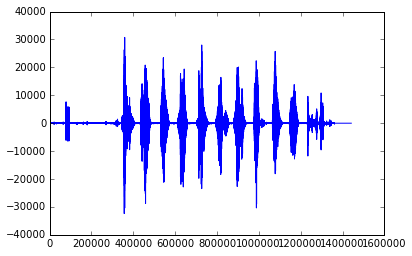

In [5]:
%matplotlib inline
import wave, struct, numpy as np, matplotlib.mlab as mlab, pylab as pl

filename = "CML_Recording_Both.wav"
w = wave.open(filename,"rb")

#returns a named tuple (nchannels, sampwidth, framerate, 
# nframes, comptype, compname)
waveParams = w.getparams()

s = w.readframes(waveParams[3])
w.close()
waveArray = np.fromstring(s, np.int16)

#plotting
pl.figure()
pl.plot(waveArray)


0.0001
(11263, 129)


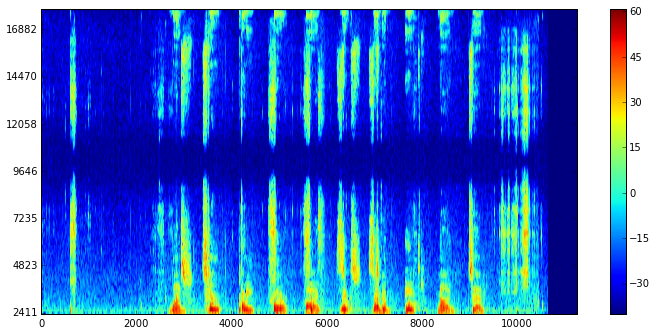

In [6]:

spectrum, freq, bins = mlab.specgram(waveArray, NFFT=256,Fs=waveParams[2],sides='onesided')
spectrum += 0.0001 # to prevent divide by zero in log10 errors

print(np.min(np.min(spectrum, axis=1), axis=0))
print(spectrum.T.shape)
fig=pl.figure(figsize=(12,12))
ax = fig.add_subplot(2,1,1)
#generate a log frequency spectrogram
imgplot = ax.imshow(10*np.log10(spectrum), origin='lower', aspect = 'auto')
fig.colorbar(imgplot)

#set tick marks on the y axis
ylcnt = len(ax.get_yticklabels())
ycnt = len(freq)
ylstep = ycnt / ylcnt
ax.set_yticklabels([ int(freq[f]) for f in xrange(0,ycnt,ylstep) ])

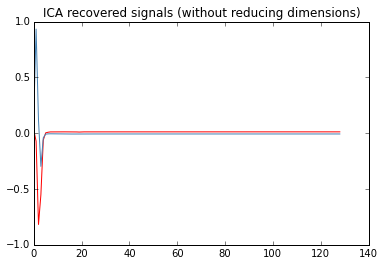

In [7]:
from sklearn.decomposition import PCA, FastICA
ncomps = 2

ica = FastICA(n_components=ncomps)
S_ = ica.fit(spectrum).transform(spectrum)
A_ = ica.mixing_

colors = ['red', 'steelblue']
pl.title("ICA recovered signals (without reducing dimensions)")
for sig, color in zip(S_.T, colors):
        pl.plot(sig, color=color)


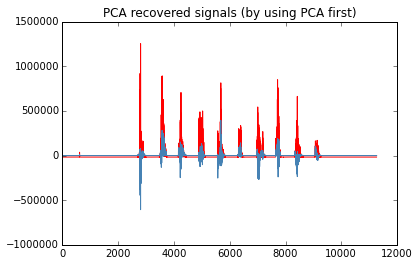

In [8]:
from sklearn.decomposition import PCA, FastICA
ncomps = 2

# reduce dimensionality with PCA
pca = PCA(n_components=ncomps)
y = spectrum.copy().T
pc = pca.fit_transform(y)

ica = FastICA(n_components=ncomps)
S_ = ica.fit(y).transform(y)

colors = ['red', 'steelblue']
pl.title("ICA recovered signals (by using PCA first)")
for sig, color in zip(S_.T, colors):
        pl.plot(sig, color=color)

       
pl.title("PCA recovered signals (by using PCA first)")
for sig, color in zip(pc.T, colors):
        pl.plot(sig, color=color)

References:
http://dsp.stackexchange.com/questions/10767/audio-signal-separation-identifying-interest-points

http://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_blind_source_separation.html

In [22]:
np.array(pl.mlab.phase_spectrum(spectrum[0])).shape

(2, 5632)

In [23]:
import scipy, pylab

def stft(x, fs, framesz, hop):
    framesamp = int(framesz*fs)
    hopsamp = int(hop*fs)
    w = scipy.hanning(framesamp)
    X = scipy.array([scipy.fft(w*x[i:i+framesamp]) 
                     for i in range(0, len(x)-framesamp, hopsamp)])
    return X

def istft(X, fs, T, hop):
    x = scipy.zeros(T*fs)
    framesamp = X.shape[1]
    hopsamp = int(hop*fs)
    for n,i in enumerate(range(0, len(x)-framesamp, hopsamp)):
        x[i:i+framesamp] += scipy.real(scipy.ifft(X[n]))
    return x

In [26]:
print(stft(waveArray,waveParams[2],  2, 10))

[[ -1.81332555e+05    +0.j           9.08845651e+04  -101.42493242j
   -4.20999201e+01  +145.46478411j ...,  -5.52500641e+02  -115.12635376j
   -4.20999201e+01  -145.46478411j   9.08845651e+04  +101.42493242j]
 [ -1.82521558e+05    +0.j           9.12656373e+04  +518.12926908j
   -1.44260212e+02  -373.49659356j ...,   1.76603223e+02  -160.53266874j
   -1.44260212e+02  +373.49659356j   9.12656373e+04  -518.12926909j]
 [ -1.81502344e+05    +0.j           9.08526260e+04   -45.51090269j
   -2.12601865e+02  +180.59829217j ...,   2.65775983e+02   +69.36355129j
   -2.12601865e+02  -180.59829217j   9.08526260e+04   +45.51090269j]
 [ -3.93819487e+04    +0.j           1.22321772e+04+30437.46037085j
    1.06788467e+04-15679.14604616j ...,  -9.22092983e+03 -5271.41527348j
    1.06788467e+04+15679.14604616j   1.22321772e+04-30437.46037085j]]


In [28]:
np.random.rand(2,3)

array([[ 0.05785785,  0.02493728,  0.02160648],
       [ 0.21720223,  0.96302964,  0.82701878]])

In [32]:
import random
np.array(random.sample(spectrum,1)).shape

(1, 11263)

In [33]:
spectrum.shape

(129, 11263)

In [ ]:
def istft(X, fs, T, hop):
    x = scipy.zeros(T*fs)
    framesamp = X.shape[1]
    hopsamp = int(hop*fs)
    for n,i in enumerate(range(0, len(x)-framesamp, hopsamp)):
        x[i:i+framesamp] += scipy.real(scipy.ifft(X[n]))
    return x

istft(spectrum, 2, 10000,)